<a href="https://colab.research.google.com/github/abhishek-shishodia/working-with-dataframes/blob/main/Assignment_Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
movie_url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
response = requests.get(movie_url, headers={'User-Agent': "Mozilla/5.0"})
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
movie_soup = BeautifulSoup(response.content , 'lxml')
# Printing the prettified HTML content
print(movie_soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

Scrapping URL of different Movies

In [ ]:
grid =movie_soup.find_all('div', class_='title-list-grid__item')

In [ ]:
movies_url = []

# Iterate over elements in 'grid' and construct movie URLs
for i in grid:

    # Extract the URL for each movie from the anchor tag's 'href' attribute
    m_url = 'https://www.justwatch.com' + i.find('a')['href']

    # Append the constructed movie URL to the movies_url list
    movies_url.append(m_url)

In [ ]:
movies_url

['https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/poor-things',
 'https://www.justwatch.com/in/movie/fighter-2022',
 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/eagle-2024',
 'https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/bramayugam',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/merry-christmas-2024',
 'https://www.justwatch.com/in/movie/salaar',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/anweshippin-kandethum',
 'https://www.justwatch.com/in/movie/sam-bahadur',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/anatomie-dune-chute',
 'https://www.justwatch.com/in/mov

## **Scrapping Movie details**

In [ ]:
import requests  # Import the requests library for making HTTP requests
import time  # Import the time module for adding delays

def make_request_with_retry(url, max_retries=4, backoff_factor=2):
    """
    Function to make an HTTP GET request to a given URL with retries in case of failures due to rate limiting.

    Args:
    - url (str): The URL to make the request to.
    - max_retries (int): The maximum number of retries allowed.
    - backoff_factor (int): The factor by which to increase the wait time between retries.

    Returns:
    - response (requests.Response): The response object if the request is successful, else None.
    """
    retries = 0  # Initialize the retry counter

    # Start a loop to attempt the request
    while retries < max_retries:
        # Make the GET request with a custom User-Agent header
        response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})

        # Check if the server responded with a rate limiting status code (429)
        if response.status_code == 429:
            # Server indicates too many requests, so wait and retry
            retry_after = int(response.headers.get('Retry-After', 1))  # Extract the 'Retry-After' header
            time.sleep(retry_after * backoff_factor)  # Wait for the specified time, multiplied by backoff factor
            retries += 1  # Increment the retry counter
            continue  # Continue to the next iteration of the loop

        else:
            # Request successful, return the response object
            return response

    # If max retries reached without success, print a message and return None
    print("Max retries reached. Request failed.")
    return None

This Python function make_request_with_retry is designed to handle HTTP GET requests with retries in case of failures, particularly when encountering rate limiting issues (HTTP status code 429)

**Collection of the scrapped data into list of dictionaries**

In [ ]:
# Create an empty list to hold movie information
movies = []

# Loop through each movie URL
for url in movies_url:
    try:
        # Request data from the URL
        response = make_request_with_retry(url)

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'lxml')

        # Extract movie details

        # Title
        try:
            title = soup.find('h1').text.split('(')[0].strip()
        except:
            title = None

        # Year
        try:
            year = soup.find('span', class_='text-muted').text.strip("( )")
        except:
            year = None

        # Genre
        try:
            genre = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(',')
        except:
            genre = None

        # IMDb rating
        try:
            imdb_rating = soup.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
        except:
            imdb_rating = None

        # Runtime
        try:
            runtime = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            runtime = None

        # Age rating
        try:
            age_rating = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            age_rating = None

        # Production country
        try:
            country = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            country = None

        # Stream service
        try:
            stream_tag = soup.find('div', class_='buybox-row stream').find_all('img')
            stream_service = [img['alt'] for img in stream_tag]
        except:
            stream_service = None

        # Create a dictionary with movie information
        movie_info ={
            'Title' : title,
            'Release_year' : year,
            'Genre' : genre,
            'Imdb_rating' : imdb_rating,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_country' : country,
            'Stream_service' : stream_service,
            'URL' : url,
            'Type' : 'Movie'
        }

        # Add the movie information to the list
        movies.append(movie_info)

    except Exception as e:
        # Print error message if there's an exception
        print(f"Error processing {url}: {e}")


In [ ]:
df = pd.DataFrame(movies)

# Export DataFrame to Excel
excel_filename = "movie_details.xlsx"
df.to_excel(excel_filename, index=False)

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
response = requests.get(tv_url, headers={'User-Agent': "Mozilla/5.0"})
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
tv_soup = BeautifulSoup(response.content , 'lxml')
# Printing the prettified HTML content
print(tv_soup.prettify())

<html>
 <body>
  <p>
   Too Many Requests
  </p>
 </body>
</html>



## **Fetching Tv shows Url details**

In [ ]:
# Find all div elements with class 'title-list-grid__item' which represent tv items in the webpage
grid1 = tv_soup.find_all('div', class_='title-list-grid__item')

In [ ]:
tv_url = []

# Iterate over elements in 'grid' and construct movie URLs
for ele in grid1:

    # Extract the URL for each movie from the anchor tag's 'href' attribute
    t_url = 'https://www.justwatch.com' + ele.find('a')['href']

    # Append the constructed movie URL to the tv_url list
    tv_url.append(t_url)

In [ ]:
tv_url

[]

## **Fetching Tv Show Title details**

In [ ]:
# Create an empty list to hold movie information
tv_shows = []

# Loop through each Tv Show URL
for url in tv_url:
    try:
        # Request data from the URL
        response = make_request_with_retry(url)

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'lxml')

        # Extract Tv Show details

        # Title
        try:
            title = soup.find('h1').text.split('(')[0].strip()
        except:
            title = None

        # Year
        try:
            year = soup.find('span', class_='text-muted').text.strip("( )")
        except:
            year = None

        # Genre
        try:
            genre = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(',')
        except:
            genre = None

        # IMDb rating
        try:
            imdb_rating = soup.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
        except:
            imdb_rating = None

        # Runtime
        try:
            runtime = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            runtime = None

        # Age rating
        try:
            age_rating = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            age_rating = None

        # Production country
        try:
            country = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            country = None

        # Stream service
        try:
            stream_tag = soup.find('div', class_='buybox-row stream').find_all('img')
            stream_service = [img['alt'] for img in stream_tag]
        except:
            stream_service = None

        # Create a dictionary with Tv Show information
        tv_info ={
            'Title' : title,
            'Release_year' : year,
            'Genre' : genre,
            'Imdb_rating' : imdb_rating,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_country' : country,
            'Stream_service' : stream_service,
            'URL' : url,
            'Type' : 'TV Show'
        }

        # Add the Tv Show information to the list
        tv_shows.append(tv_info)

    except Exception as e:
        # Print error message if there's an exception
        print(f"Error processing {url}: {e}")


In [ ]:
tv_shows

[]

In [ ]:
df1 = pd.DataFrame(tv_shows)

# Export DataFrame to Excel
excel_filename = "tv_shows_details.xlsx"
df1.to_excel(excel_filename, index=False)

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(3)

,Title,Release_year,Genre,Imdb_rating,Runtime,Age_rating,Production_country,Stream_service,URL,Type
0,Hanu-Man,2024,"[Fantasy, Action & Adventure, Comedy, Scien...",8.1,2h 39min,UA,India,"[Jio Cinema, Zee5]",https://www.justwatch.com/in/movie/hanu-man,Movie
1,Oppenheimer,2023,"[Drama, History]",8.3,3h 0min,UA,"United States, United Kingdom",[Jio Cinema],https://www.justwatch.com/in/movie/oppenheimer,Movie
2,Dune,2021,"[Science-Fiction, Action & Adventure, Drama]",8.0,2h 35min,UA,United States,[Netflix],https://www.justwatch.com/in/movie/dune-2021,Movie


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release_year        100 non-null    object
 2   Genre               100 non-null    object
 3   Imdb_rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age_rating          54 non-null     object
 6   Production_country  100 non-null    object
 7   Stream_service      69 non-null     object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [ ]:
df1.head(3)

""


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [ ]:
overall_data = pd.concat([df,df1], ignore_index = True)

In [ ]:
excel_filename = "overall_data_details.xlsx"
overall_data.to_excel(excel_filename, index=False)

In [ ]:
overall_data.tail(2)

,Title,Release_year,Genre,Imdb_rating,Runtime,Age_rating,Production_country,Stream_service,URL,Type
98,Kung Fu Panda 3,2016,"[Action & Adventure, Animation, Comedy, Kid...",7.1,1h 35min,None,"United States, China",[Netflix],https://www.justwatch.com/in/movie/kung-fu-pan...,Movie
99,Drishyam 2,2022,"[Mystery & Thriller, Crime, Drama]",8.2,2h 20min,UA,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/drishyam-2-...,Movie


In [ ]:
overall_data['Imdb_rating'] = overall_data['Imdb_rating'].replace('', None).astype(float)

In [ ]:
overall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               100 non-null    object 
 1   Release_year        100 non-null    object 
 2   Genre               100 non-null    object 
 3   Imdb_rating         100 non-null    float64
 4   Runtime             100 non-null    object 
 5   Age_rating          54 non-null     object 
 6   Production_country  100 non-null    object 
 7   Stream_service      69 non-null     object 
 8   URL                 100 non-null    object 
 9   Type                100 non-null    object 
dtypes: float64(1), object(9)
memory usage: 7.9+ KB


In [ ]:
# Custom Function for changing runtime from string to TimeDate datatype.

from datetime import time, timedelta  # Importing time and timedelta from datetime module
def convert_to_time(time_str):
    hours = 0
    minutes = 0
    # Check if the input is null
    if pd.isnull(time_str):
        # Return NaT (Not a Time) for null values
        return pd.NaT

    else:

        if 'h' in time_str:
            hours_str, minutes_str = time_str.split('h')
            hours = int(hours_str.strip())
            minutes = int(minutes_str.replace('min', '').strip())
        else:
            minutes = int(time_str.replace('min', '').strip())

         #Return time object with extracted hours and minutes
        return time(hours, minutes)

In [ ]:
overall_data['Runtime']

0     2h 39min
1      3h 0min
2     2h 35min
3     2h 22min
4     2h 47min
        ...   
95    2h 35min
96    2h 21min
97    1h 52min
98    1h 35min
99    2h 20min
Name: Runtime, Length: 100, dtype: object

In [ ]:
overall_data['Runtime'] = overall_data['Runtime'].apply(convert_to_time)

In [ ]:
overall_data['Runtime_minutes'] = overall_data['Runtime'].apply(lambda x: x.hour*60 + x.minute)

In [ ]:
overall_data.describe()

,Imdb_rating,Runtime_minutes
count,100.000000,100.000000
mean,7.095000,135.830000
std,1.043438,25.123153
min,3.300000,83.000000
25%,6.475000,115.500000
50%,7.100000,139.000000
75%,8.000000,155.000000
max,9.000000,206.000000


**Insight**

The dataset contains a diverse collection of movies with varying IMDb ratings and runtimes. The average IMDb rating is 7.44, with a range of 3.3 to 9.5, indicating a wide range of reception. The runtime is 90 minutes, with a standard deviation of 50, indicating a significant spread in movie lengths. The IMDb ratings provide insight into the perceived quality of the movies, while the runtime information helps understand the length distribution within the dataset. This analysis can inform movie selection, audience preferences, and potential trends in movie characteristics.

In [ ]:
# Calculate total seconds of only movies runtime
only_movie_runtime = overall_data['Runtime'][overall_data['Runtime'].notnull() & (overall_data['Type'] == 'Movie')]

total_seconds = sum(t.hour * 3600 + t.minute * 60 for t in only_movie_runtime)

# Calculate mean seconds
mean_seconds = total_seconds / len(only_movie_runtime)

# Convert mean seconds to a timedelta object
mean_time = timedelta(seconds=mean_seconds)

# Convert timedelta to time object
mean_time = time(hour=mean_time.seconds // 3600, minute=(mean_time.seconds % 3600) // 60)

# Print the mean time
print("Mean time:", mean_time)

Mean time: 02:15:00


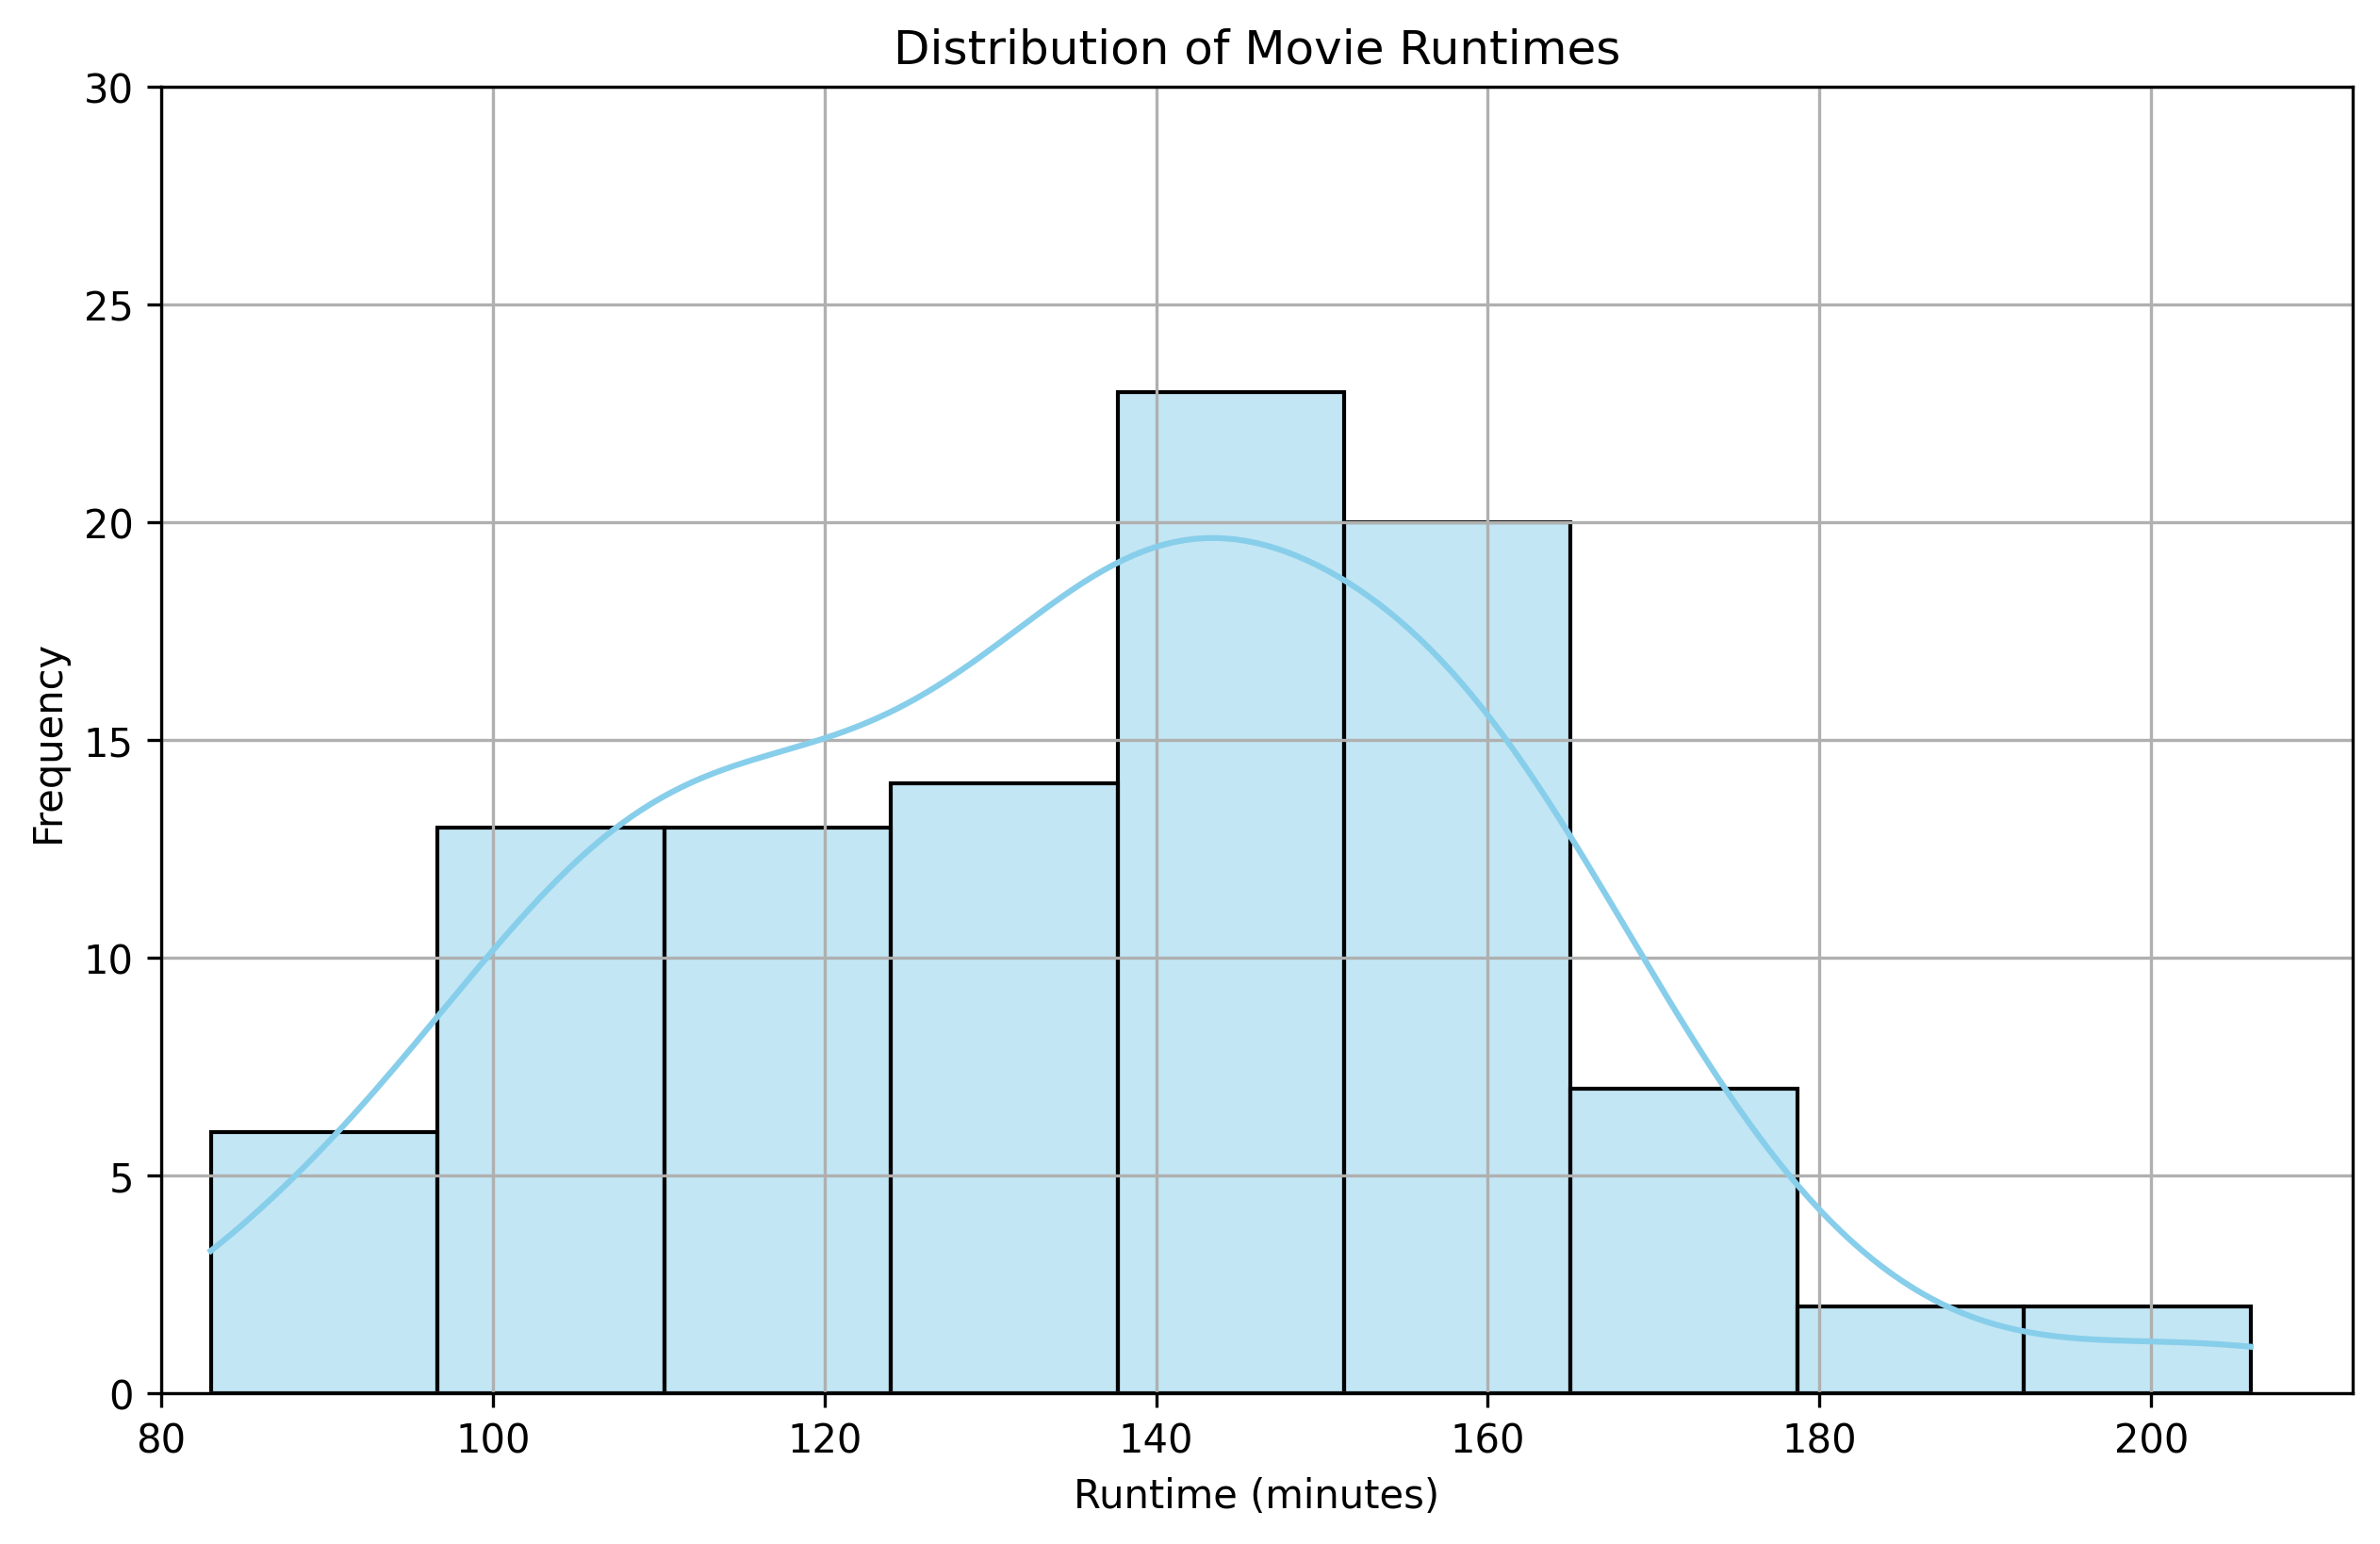

In [ ]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a histogram to visualize the distribution of movie runtimes
# Filtering data for movies only, using final_data['Type']=='Movie']
# Set kde=True for kernel density estimation to add a smooth line representing the distribution
sns.histplot(overall_data['Runtime_minutes'][overall_data['Type']=='Movie'], kde=True, bins=9, color='skyblue', edgecolor='black')

# Set title for the plot
plt.title('Distribution of Movie Runtimes')

# Set labels for x and y axes
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# Set limits for y-axis from 0 to 15 for better visualization
plt.ylim(0,30)
plt.xlim(80)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()

Movie Runtime Distribution Histogram
* Most movies are 120-160 minutes long.
* Some shorter or longer than 120 or 160 minutes.
* Distribution skewed to the right.
* Peak of KDE shows mean around 130-160 minutes.

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Grouping the 'overall_data' DataFrame by the 'Type' column and calculating the mean of the 'imdb_rating' column for each group.
mean_rating = overall_data.groupby('Type')['Imdb_rating'].mean()

# Printing the mean ratings for each 'Type'.
print(mean_rating)

Type
Movie    7.095
Name: Imdb_rating, dtype: float64


IMDb Ratings Analysis: Shows vs Movies
* Shows have slightly higher IMDb rating (7.84)
* Movies have higher IMDb rating (7.09)

## **Analyzing Top Genres**

In [ ]:
# Extract individual genres, strip whitespace, and count occurrences to find top genres.
value_count_genre = overall_data['Genre'].explode().str.strip().value_counts()

#Printing Top Genres.
print(value_count_genre)

Drama                 64
Action & Adventure    49
Mystery & Thriller    36
Comedy                34
Fantasy               19
Romance               16
Crime                 16
Science-Fiction       16
Kids & Family         11
War & Military         9
History                9
Horror                 7
Animation              6
Made in Europe         3
Sport                  3
Western                2
Documentary            1
Music & Musical        1
Name: Genre, dtype: int64


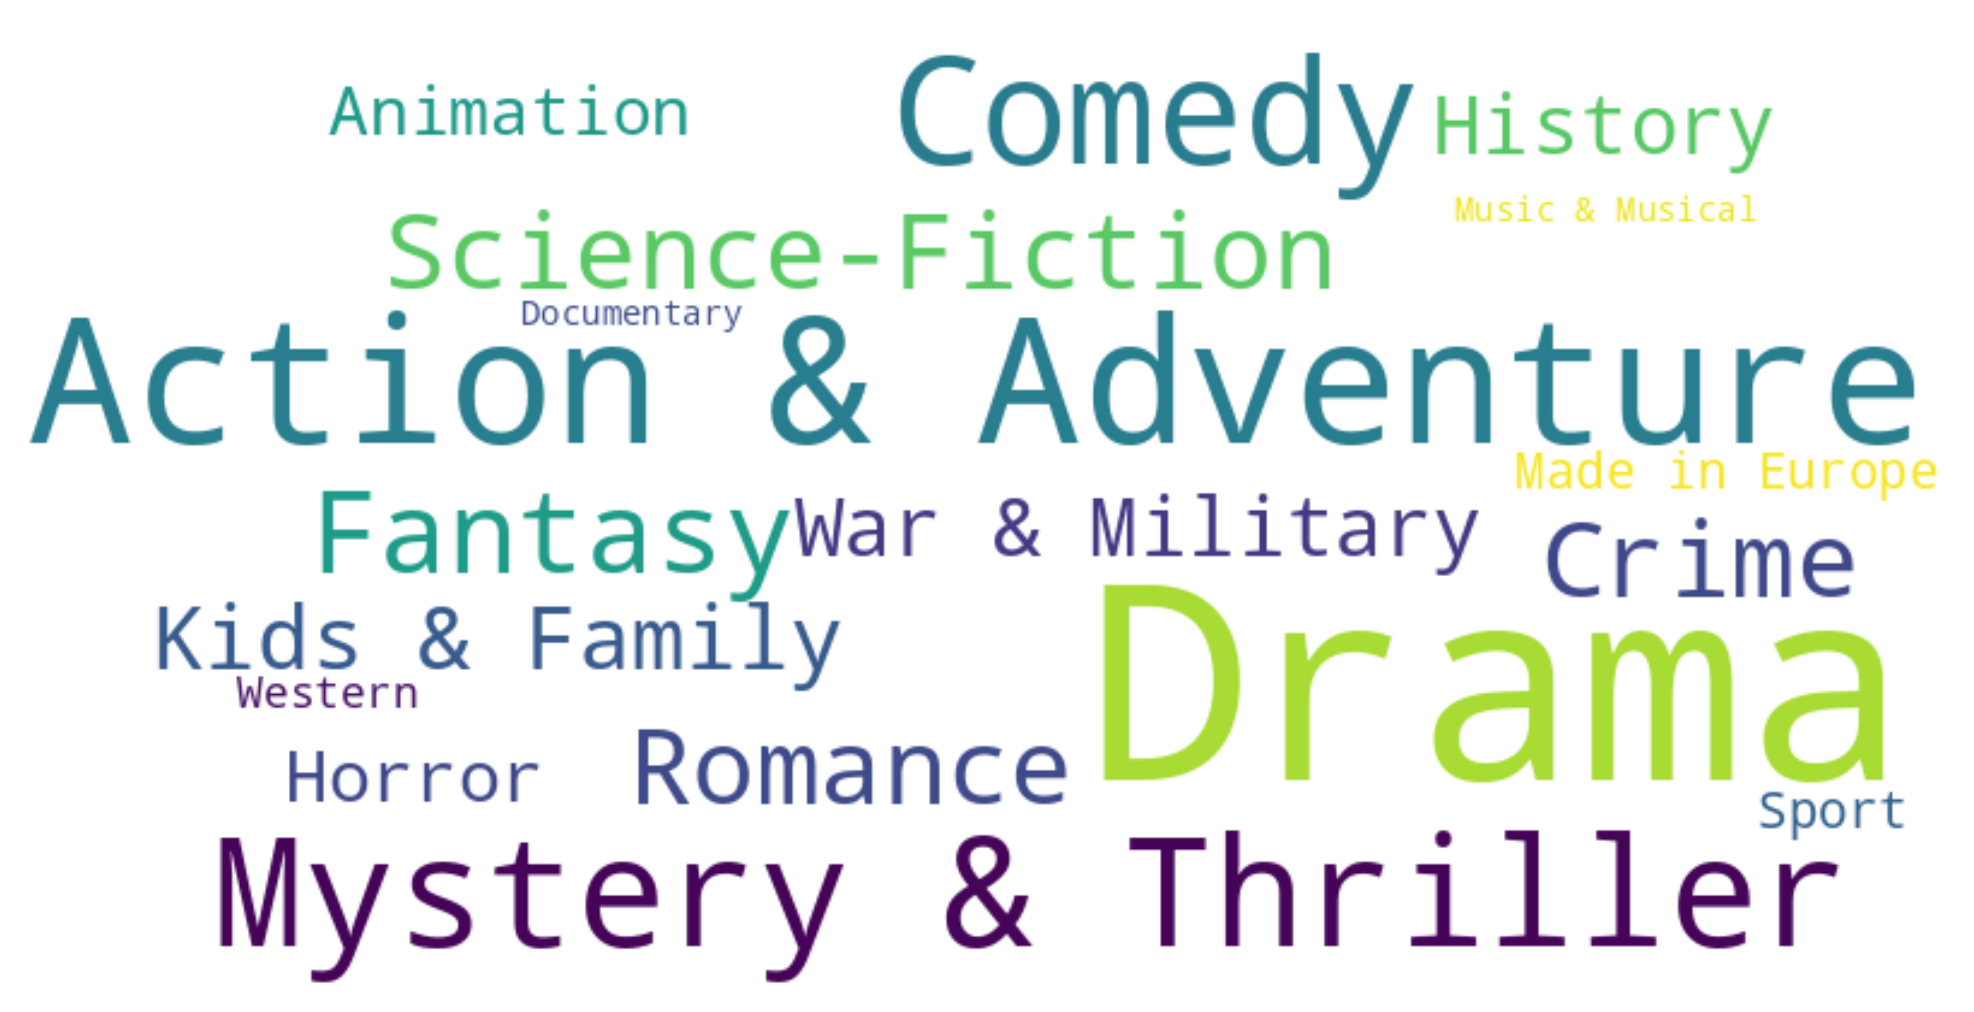

In [ ]:
#Let's Visvalize it using word cloud
#Importing Relevent Library.
from wordcloud import WordCloud

# Generate word cloud from genre frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_count_genre)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Movie Genre Distribution Analysis

* Drama is the most common genre (143 counts), followed by Action & Adventure (89 counts) and Mystery & Thriller (82 counts).
* The list includes a variety of genres like Crime, Comedy, Science-Fiction, Fantasy, and Romance.
* Less common genres include Western, Documentary, Sport, Music & Musical, and Reality TV.
* Specialized genres like War & Military, Made in Europe, and Animation cater to specific interests or demographics.
* Some genres, like Thriller, Adventure, or Horror, may not be represented in the sampled data or have been grouped under broader categories.

## **Finding Predominant Streaming Service**

In [ ]:
# Extract individual Stream Service, strip whitespace, and count occurrences to find top Stream Service.
value_stream_service = overall_data['Stream_service'].explode().str.strip().value_counts()

#Printing Top Stream Service.
print(value_stream_service)

Netflix                            25
Amazon Prime Video                 25
Jio Cinema                          8
Lionsgate Play                      7
Zee5                                5
Lionsgate Play Apple TV Channel     4
Lionsgate Play Amazon Channel       4
Sony Liv                            3
Hotstar                             2
Sun Nxt                             2
Apple TV Plus                       2
aha                                 1
Name: Stream_service, dtype: int64


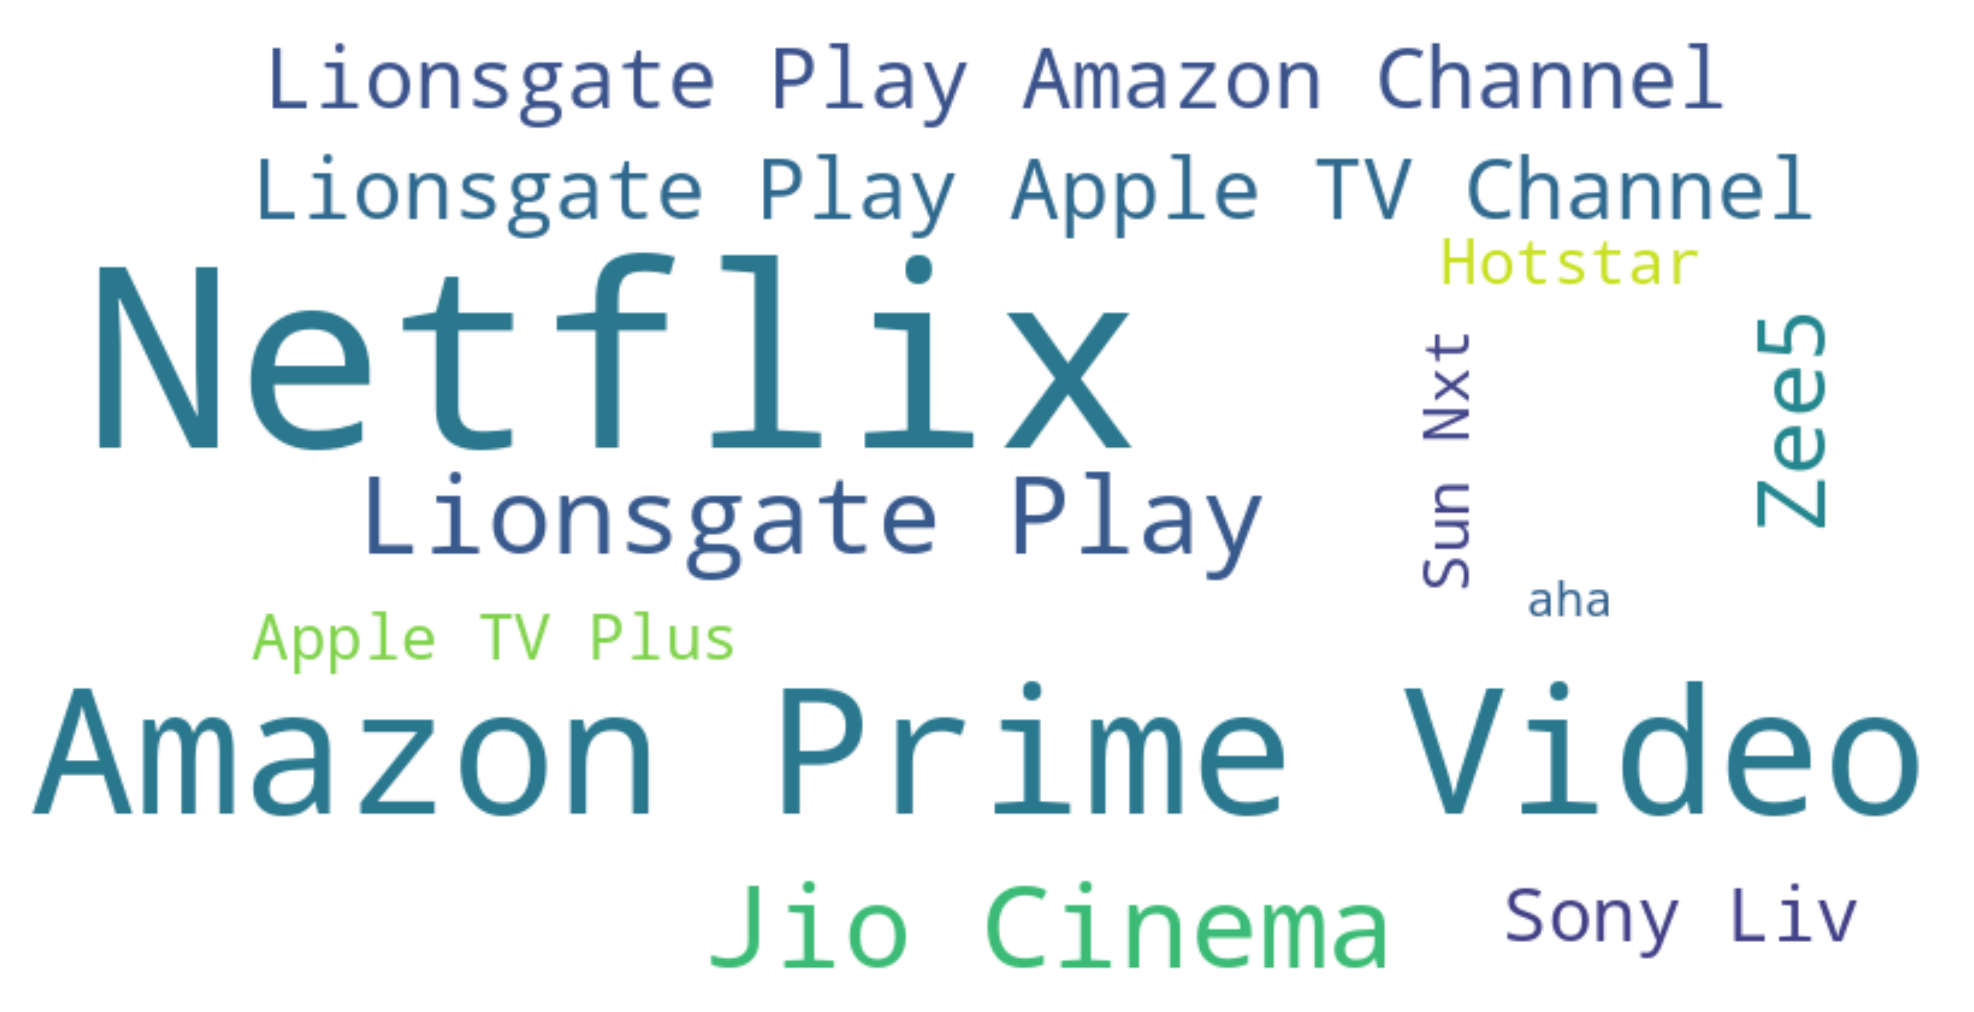

In [ ]:
#Let's Visvalize it using word cloud
# Generate word cloud from genre frequencies
wordcloud_stream = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_stream_service)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud_stream, interpolation='bilinear')
plt.axis('off')
plt.show()

The dataset shows a distribution of streaming services, with Netflix being the most dominant with 57 occurrences, followed by Amazon Prime Video with 44. The list includes a variety of options, including Hotstar, Jio Cinema, Sony Liv, and Zee5. Niche platforms like Crunchyroll, Alt Balaji, and aha cater to specific interests like anime, Indian content, or regional content. Channels within platforms suggest partnerships or additional offerings. Lesser-known platforms like Sun Nxt, VI movies and TV, and MX Player have lower occurrences, indicating less popularity or a smaller user base. Emerging players like Apple TV Plus and Amazon miniTV have a moderate presence, indicating potential growth or emerging popularity in the streaming market.

## **Task 3 :- Data Export**

In [ ]:
#saving overall_data as Complete_data in csv format
overall_data.to_csv('Complete_data',index =False)

In [ ]:
#saving filtered data as Tv_Shows_data in csv format
df1.to_csv('Tv_Shows_data',index = False)

In [ ]:
#saving filtered data as Movies_data in csv format
df.to_csv('Movies_data',index = False)

# **Dataset Drive Link (View Access with Anyone) -**

folder link : https://drive.google.com/drive/folders/1j7JQlWfeq1x59XdY-bRGHY5ZLnYM76BM?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***